## Here we will develope our Ridge Regression model from scratch

###First We will import Original Ridge regression from sklearn library 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression

####First we will load the datasets for one independent and one dependent variable & apply Ridge on it

In [2]:
X,y = make_regression(n_samples=200,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13) 

In [3]:
print(X.shape)
print(y.shape) 

(200, 1)
(200,)


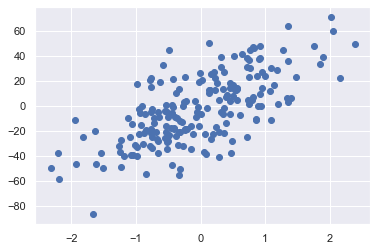

In [4]:
sns.set() 
plt.scatter(X,y) 
plt.show() 

In [5]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X,y,test_size=0.2,random_state=2) 

In [6]:
Ri1 = Ridge(alpha=1)  

In [7]:
Ri1.fit(X1_train,y1_train) 

Ridge(alpha=1)

In [8]:
y1_pred = Ri1.predict(X1_test) 
y1_pred

array([ -8.9506936 , -41.33897967, -18.49429115, -20.23392492,
       -13.50225771,  45.5257972 , -13.14661036,  -1.10229248,
       -24.41944592,  -2.79859874, -13.65165489,   6.32964924,
        39.88684301,   1.23526704,  -9.00547467, -17.1314084 ,
       -29.15202176, -36.88908081,  12.465675  ,  14.07307969,
       -12.71979036,  -0.32046502, -23.07961056,   5.40249146,
        -4.85963891,  10.11182589,  23.37517402,  -2.12534192,
       -25.09168714,  -9.95397609, -16.55897383, -18.17090682,
       -20.02235446,  17.30984302,  -9.12553773, -11.13025957,
         9.20426297,   7.40487218, -18.26171969,  22.00392737])

In [9]:
r2_score(y1_test,y1_pred) 

0.3420496781457403

In [10]:
Ri1.coef_

array([21.88688793])

In [11]:
Ri1.intercept_

-1.539393818204702

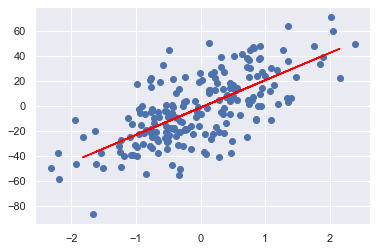

In [12]:
sns.set() 
plt.scatter(X,y)
plt.plot(X1_test,Ri1.predict(X1_test),color='red') 
plt.show() 

#####Now we load the dataset of multiple independent & one dependent variable & apply Ridge on it

In [13]:
X,y = load_diabetes(return_X_y=True)  

In [14]:
print(X.shape)
print(y.shape) 

(442, 10)
(442,)


In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2) 

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape) 

(353, 10)
(89, 10)
(353,)
(89,)


In [17]:
Ri = Ridge(alpha=0.1,solver='cholesky')  

In [18]:
Ri.fit(X_train,y_train) 

Ridge(alpha=0.1, solver='cholesky')

In [19]:
y_pred = Ri.predict(X_test) 
y_pred

array([152.3633031 , 200.37711396, 127.35659061, 105.51536087,
       262.77747327, 247.34716602, 114.02139969, 116.72913595,
        98.65701079, 186.99895269, 144.45192352, 170.18051694,
       175.72799369, 136.46868338, 290.72901283,  90.82755846,
       203.12204432, 149.57640625, 132.71492329, 126.89500778,
       148.96141781, 171.11672376, 150.20696236, 175.09026538,
       128.62317935, 217.08052343, 196.84876896, 102.28834332,
        58.51609579, 234.60635703, 241.49142671, 113.61898242,
        71.4984777 ,  97.9289529 , 202.87217033, 163.25518829,
       159.96959925, 190.55501564, 114.78683196, 233.76968572,
       141.55923012, 121.38689712, 189.3825298 , 185.29491397,
       174.54957274, 144.51405894, 166.66176597, 293.48511004,
       105.41855408, 168.49739731, 251.21994467, 142.92907654,
       151.33209952, 118.74572758, 190.92878945,  93.32862947,
       127.39159323,  76.30844339, 155.75736796, 157.44730263,
       163.89619012, 160.2050392 , 103.16747069, 227.96

In [20]:
r2_score(y_test,y_pred) 

0.4519973816947852

In [21]:
Ri.coef_

array([   6.64275308, -172.24216584,  485.52387163,  314.68212174,
        -72.93932312,  -80.59005344, -174.46651489,   83.61665316,
        484.36328537,   73.58415414])

In [22]:
Ri.intercept_

151.92548050708137

#### Now First we will Create our own Ridge regession for SINGLE VARIABLE.

In [23]:
class meraRidge:
    
    def __init__(self,alpha):
        self.alpha = alpha
        self.coef = None
        self.intercept = None
    
    def fit(self,X1_train,y1_train):
        x_mean = X1_train.mean() 
        y_mean = y1_train.mean() 
        c = 0
        d = 0
        for i in zip(X1_train,y1_train):
            c = c + ((i[0]-x_mean)*(i[1]-y_mean))
            d = d + (((i[0]-x_mean)*(i[0]-x_mean)))
        self.coef = c/(d+self.alpha) 
        self.intercept = y_mean - self.coef * x_mean
        return print('Ridge(alpha={})'.format(self.alpha))  
    
    def predict(self,X1_test):
        return np.dot(X1_test,self.coef) + self.intercept

In [24]:
Ri1 = meraRidge(alpha=1)  

In [25]:
Ri1.fit(X1_train,y1_train) 

Ridge(alpha=1)


In [26]:
Ri1.predict(X1_test) 

array([ -8.9506936 , -41.33897967, -18.49429115, -20.23392492,
       -13.50225771,  45.5257972 , -13.14661036,  -1.10229248,
       -24.41944592,  -2.79859874, -13.65165489,   6.32964924,
        39.88684301,   1.23526704,  -9.00547467, -17.1314084 ,
       -29.15202176, -36.88908081,  12.465675  ,  14.07307969,
       -12.71979036,  -0.32046502, -23.07961056,   5.40249146,
        -4.85963891,  10.11182589,  23.37517402,  -2.12534192,
       -25.09168714,  -9.95397609, -16.55897383, -18.17090682,
       -20.02235446,  17.30984302,  -9.12553773, -11.13025957,
         9.20426297,   7.40487218, -18.26171969,  22.00392737])

In [27]:
Ri1.coef

array([21.88688793])

In [28]:
Ri1.intercept

array([-1.53939382])

In [29]:
# WE OUR GETTING THE SAME VALUES WITH OUR CODED MODEL; HENCE PROVED

##Now we will Code Ridge regression for Multiple Variables or n variable 

In [30]:
class meraMRidge:
    
    def __init__(self,alpha):
        self.alpha = alpha
        self.coef = None
        self.intercept = None
        
    def fit(self,X_train,y_train):
        X_train = np.insert(X_train,0,1,axis=1) 
        I = np.identity(X_train.shape[1]) 
        result = np.linalg.inv(np.dot(X_train.T,X_train) + (self.alpha*I)).dot(X_train.T).dot(y_train) 
        self.intercept = result[0]
        self.coef = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef) + self.intercept
        

In [31]:
Ri3 = meraMRidge(alpha=0.1) 

In [32]:
Ri3.fit(X_train,y_train) 

In [33]:
print(Ri3.coef) 
print(Ri3.intercept)

[   6.64872075 -172.25405003  485.49370117  314.68963226  -72.93830784
  -80.60280573 -174.45578798   83.57534367  484.39662215   73.58389565]
151.88222786033788


In [34]:
Ri3.predict(X_test) 

array([152.32316023, 200.33184815, 127.31271981, 105.4754002 ,
       262.73384817, 247.29450086, 113.98435928, 116.689254  ,
        98.61924526, 186.95134513, 144.40848427, 170.13546362,
       175.67868378, 136.42417158, 290.68619577,  90.79031129,
       203.0777895 , 149.53746714, 132.67275539, 126.85077279,
       148.91914077, 171.066919  , 150.15895727, 175.04775214,
       128.58368617, 217.03037877, 196.80255536, 102.24526722,
        58.4744874 , 234.55690001, 241.44071644, 113.57778857,
        71.4571509 ,  97.88509524, 202.82955271, 163.20829678,
       159.92548456, 190.50877052, 114.74622842, 233.7274182 ,
       141.51422235, 121.34562507, 189.33428193, 185.24967287,
       174.50509508, 144.46841713, 166.61673887, 293.43751481,
       105.37498574, 168.45009169, 251.17752688, 142.8836114 ,
       151.28782808, 118.69676022, 190.88610831,  93.28286277,
       127.34402554,  76.26729513, 155.7144795 , 157.40234284,
       163.85464847, 160.15736509, 103.1256558 , 227.92

##As we can se Sklearn model and our model is providing us same results.